![PNS](http://caillau.perso.math.cnrs.fr/logo-pns.png)
## MAM3 - MI2
# Exam CC no. 1

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/jbcaillau/mi2/master?urlpath=lab/tree/exam-cc1-old/exam-cc1.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jbcaillau/mi2/blob/master/exam-cc1-old/exam-cc1.ipynb)

__Durée 1H30. Tous les exercices sont indépendants.
Le barème prévisionnel est indiqué pour chaque exercice.
Documents autorisés : une feuille de notes de cours recto-verso manuscrite.__

## Exercice 1 (3 points)
Montrer que l'application $f : \mathbf{R}^2 \to \mathbf{R}^3$ définie par
$$ f(x_1,x_2) := \left[ \begin{array}{c}
  x_1x_2\exp(x_1)-x_2^2\\
  x_2^2\cos(x_1-x_2^2)\\
  x_1+x_2
 \end{array} \right] $$
est dérivable et donner l'expression de sa dérivée.

$\rhd$ Les dérivées partielles de chaque composante de l'application
existent et sont continues, la fonction est donc de classe $\mathscr{C}^1$ (et en particulier
dérivable). On a
$$ f'(x) =
  \left[ \begin{array}{ccc}
  (x_2+x_1x_2)\exp(x_1) & x_1\exp(x_1)-2x_2\\
  -x_2^2\sin(x_1-x_2^2) & 2x_2\cos(x_1-x_2^2)+2x_2^3\sin(x_1-x_2^2)\\
  1 & 1
  \end{array} \right]. $$

## Exercice 2 (4 points)
### 2.1
Montrer que l'application $f : \mathbf{R}^n \to \mathbf{R}$ définie par
$$ f(x) := \ln(1+\|x\|^2) $$
est dérivable et donner l'expression de son gradient. La norme désigne la norme
euclidienne sur $\mathbf{R}^n$,
$$ \|x\|=(|x_1|^2+\cdots+|x_n|^2)^{1/2}. $$

$\rhd$ L'application est dérivable comme composée d'applications
dérivables, $x \mapsto \|x\|^2 \mapsto \ln(1+\|x\|^2)$, d'où
$$ \nabla f(x) = \frac{2x}{1+\|x\|^2}\cdot $$

### 2.2
Montrer que $\nabla f$ est également dérivable et donner
l'expression du hessien de $f$.

$\rhd$
Le gradient est dérivable comme produit (vecteur $\times$ scalaire,
bilinéaire) et composition d'applications dérivables, et
$$ \nabla^2 f(x) = \frac{2(1+\|x\|^2)I-4x\,^t x}{(1+\|x\|^2)^2} \cdot $$

## Exercice 3 (6 points)
### 3.1
Mettre l'équation différentielle
$$ \dot{x}(t)=x(t)-1 $$
sous la forme $\dot{x}(t)=f(t,x(t))$ avec $f:\mathbf{R}^2 \to \mathbf{R}$ que l'on précisera.

$\rhd$
$$ f(t,x) = x-1 $$

### 3.2
Étant donné $(t_0,x_0) \in \mathbf{R}^2$,
justifier que l'équation différentielle
$$ \dot{x}(t)=x(t)-1,\quad x(t_0)=x_0, $$
possède une unique solution maximale.

$\rhd$ L'application $f$ est
de classe $\mathscr{C}^1$, donc le théorème des accroissements finis permet d'affirmer
qu'elle est localement lipschitzienne en $x$. Le théorème de Cauchy-Lipschitz
s'applique donc et garantit l'existence et l'unicité de solution maximale pour toute
condition initiale.

### 3.3
Déterminer la solution maximale de l'équation différentielle
$$ \dot{x}(t)=x(t)-1,\quad x(0)=1. $$

$\rhd$ $x(t)=1$, pour tout $t \in \mathbf{R}$

### 3.4
On considère l'équation différentielle
$$ \dot{x}(t)=x(t)-1,\quad x(0)=2. $$
Justifier que sa solution maximale est toujours strictement supérieure à $1$,
et déterminer cette solution maximale.

$\rhd$ Si la solution prenait la valeur $1$, elle serait identiquement
égale à $1$ (ce qui est interdit par la condition intiale). Donc $x(t) \neq 1$
pour tout $t$ de l'intervalle de définition
(en vertu de l'unicité de solution) et, par continuité,
soit $x(t)>1$, soit $x(t)<1$. Vu la condition initiale, on a constamment $x(t)>1$.
On peut donc
résoudre le problème posé en divisant pour "séparer les variables" :
$$ \mathrm{d}x/(x-1) = \mathrm{d}t, $$
soit, en intégrant,
$$ \ln\left| \frac{x(t)-1}{x(0)-1} \right| = \ln(x(t)-1) = t, $$
On obtient
$$ x(t) = e^t+1,\quad t \in \mathbf{R}, $$
qui est nécessairement maximale
puisque définie sur tout $\mathbf{R}$.

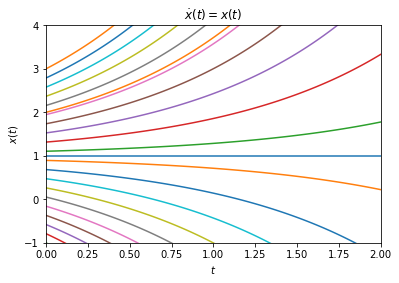

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
plt.ion() # interactive mode on

def f(t, x):
    """dx = f(t, x)
      
    Second membre"""
    dx = x-1.
    return dx

N = 20
xx0 = np.linspace(-1., 3, N)
xx0 = np.hstack((np.array([ 1, 2 ]), xx0)) # adds initial conditions x(0)=1 and x(0)=2
t0 = 0.
tf = 2.
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.title('$\dot{x}(t)=x(t)$')
plt.xlim(t0, tf)
plt.ylim(-1., 4)
for x0 in np.nditer(xx0):
    M = 100
    tspan = np.linspace(t0, tf, M)
    x = odeint(lambda x, t: f(t, x), x0, tspan)
    plt.plot(tspan, x)
plt.show()

## Exercice 4 (7 points)
On rappelle que $\ell^p$, l'ensemble des suites réelles de puissance $p$-ième
sommable, est défini comme suit :
$$ \ell^p := \{(x_k)_k \in \mathbf{R}^\mathbf{N}\ |\ \sum_{k=0}^\infty |x_k|^p < \infty \},\quad
   1 \leq p \leq \infty. $$

### 4.1
Montrer qu'on définit une norme sur $\ell^1$ en posant
$$ \|(x_k)_k\|_1 = \sum_{k=0}^\infty |x_k|. $$

$\rhd$ (i) La positivité est évidente, et $\sum_k |x_k|=0$ implique
$|x_k|=0$ pour tout $k$ (série à termes positifs), donc $(x_k)_k$ est bien la
suite nulle ; (ii) soit $\lambda \in \mathbf{R}$, $\sum_k |\lambda x_k|=\lim_{K \to \infty}
|\lambda| \sum_{k=0}^K |x_k| = |\lambda| \sum_k |x_k|$ ; (iii) $\sum_k |x_k+y_k| \leq
\sum_k (|x_k|+|y_k|) = \sum_k |x_k| + \sum_k |y_k|$.

### 4.2
La suite $(x_k)_k$ de terme général $x_k=1/(k+1)$, $k \in \mathbf{N}$,
appartient-elle à $\ell^1$ ? À $\ell^2$ ? Qu'en déduit-on ?

$\rhd$
D'après le critère de Riemann, la suite est dans $\ell^2$, pas dans $\ell^1$. On
sait d'après le TD que $\ell^1 \subset \ell^2$, l'inclusion est donc stricte.

### 4.3
On définit la suite $(X_n)_n \in (\ell^1)^\mathbf{N}$ en posant
$$ X_n := (\underbrace{1,\dots,1}_{n \text{ fois}},0,0,0,\dots), $$
c'est à dire en posant
$$ \begin{eqnarray*}
  X_0 &:=& (0,0,0,0,0,\dots),\\
  X_1 &:=& (1,0,0,0,0,\dots),\\
  X_2 &:=& (1,1,0,0,0,\dots),\\
  X_3 &:=& (1,1,1,0,0,\dots),\\
      & \vdots
\end{eqnarray*} $$
Justifier que, pour tout $n \in \mathbf{N}$, $X_n$ appartient effectivement à $\ell^1$.

$\rhd$ Chacune des suites est presque nulle (seul un nombre fini de
termes sont non nuls), donc chacune d'elles appartient à $\ell^1$.

### 4.4
Pour $n \in \mathbf{N}$, calculer $\|X_{n+1}-X_n\|_1$.
La suite $(X_n)_n$ est-elle de Cauchy dans $\ell^1$ ?
La suite $(X_n)_n$ converge-t-elle dans $\ell^1$ ?

$\rhd$ On a $\|X_{n+1}-X_n\|_1=1$, la suite n'est donc pas de Cauchy. Elle
n'est donc pas convergente.